## Homework 1

For your first homework you need to find a time series. Just plot it and submit it. I will give you feedback *if* your series contains anomalies that cannot be handled with the methods learned in class. You will analyze the series in your future homeworks. 

Please modify the Jupyter notebook below. Code and Markdown cells that need to be adjusted are in <span style="color:green">green</span>. Replace the example series with your chosen series. Save the file as 'HW1_[your last name here].ipynb' (e.g. 'HW1_sivec.ipynb'). Submit also the data file (xls or csv). Name the data file 'data_[your last name here].file_extension' (e.g. 'data_sivec.xls'). 

Submission should contain the following two files: (1) Modified 'HW1.ipynb' and (2) 'data_[your last name here].file_extension'. 

**Submitt to vasja.sivec@uni.lu by 16.Oct.2022**
***
***
*List of suggested sources*: 

    Statec - National Institute of statistics and economic studies of the Grand Duchy of Luxembourg

https://statistiques.public.lu/en.html

    Eurostat - Statistical office of the EU - features numerous series on economy, finance, population, industry, environment,...

https://ec.europa.eu/eurostat/web/main/data/database  

    ECB SDW - European Central Bank data - data on interest rates, loans, exchange rates, financial corporations,... for european countries

https://sdw.ecb.europa.eu/

    World Bank data - Global development data (rGDP, population, social conditions,...) for almost all the countries in the world.  

https://data.worldbank.org/

    IMF data - International Monetary Fund data features data on economic and financial conditions for most countries of the world

https://www.imf.org/en/Data

    FRED data - Federal Reserve Bank of St. Louis - go-to source for any data on socio-economic conditions in the US

https://fred.stlouisfed.org/ 

    Pen world data - University of Groningen development statistics

https://www.rug.nl/ggdc/productivity/pwt/?lang=en

    Climate change data

https://www.climate.gov

Feel free to explore other sources! This could be the statistical office of your own country or a time series related to your hobby. It is advisable to select a series that features a sufficient number of observations, say at least 40. 



# Source and description

<span style="color:green">Full link or name of the provider: </span> https://fred.stlouisfed.org/series/RGDPNALUA666NRUG \
<span style="color:green">Series code: </span> RGDPNALUA666NRUG \
<span style="color:green">Date of access: </span>  Oct.12.2022 \
<span style="color:green">Description: </span> Luxembourg gross domestic product at constant prices. Not seasonally adjusted.   


# Characteristics

<span style="color:green"> Periodicity or frequency: </span> Annual  \
<span style="color:green"> Time span: </span> 1950-2019 \
<span style="color:green"> Number of observations: </span> 70  

# Figure

Plot the series and corresponding correlation and autocorrelation functions. Please plot also the first differences of the series. <span style="color:green">Modify the code below</span> so that it imports and plots your series.

In [2]:
# PART 1: Plot levels of the series and AC& PAC
# import packages
# pip  install xlrd    
import os
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data

src_train = 'C:/Users/wang/Downloads/train.csv.zip'
src_test = 'C:/Users/wang/Downloads/test.csv.zip'
# If you cannot load the directly the csv from Google drive (Google restrictions), download them manually then change the path to load them locally

df_train = pd.read_csv(src_train, compression="zip")
df_test= pd.read_csv(src_test, compression="zip")



df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


In [172]:
print(df_train['Type'].value_counts())
print(df_test['Type'].value_counts())

A    144559
B    109413
C     28479
Name: Type, dtype: int64
A    70919
B    54082
C    14118
Name: Type, dtype: int64


In [173]:
df_train= df_train.loc[df_train['Weekly_Sales'] > 0]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281551 entries, 0 to 282450
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         281551 non-null  int64  
 1   Dept          281551 non-null  int64  
 2   Date          281551 non-null  object 
 3   Weekly_Sales  281551 non-null  float64
 4   IsHoliday     281551 non-null  bool   
 5   Temperature   281551 non-null  float64
 6   Fuel_Price    281551 non-null  float64
 7   MarkDown1     100176 non-null  float64
 8   MarkDown2     73999 non-null   float64
 9   MarkDown3     91218 non-null   float64
 10  MarkDown4     89720 non-null   float64
 11  MarkDown5     100683 non-null  float64
 12  CPI           281551 non-null  float64
 13  Unemployment  281551 non-null  float64
 14  Type          281551 non-null  object 
 15  Size          281551 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 34.6+ MB


In [174]:
def get_missing_columns(df, top_N = 20):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
  missing  = pd.concat([total, percent], axis=1, keys=['Total', 'MIssing Data Percent'])
  return missing.head(top_N)
print(get_missing_columns(df_train))

               Total  MIssing Data Percent
MarkDown2     207552             73.717373
MarkDown4     191831             68.133660
MarkDown3     190333             67.601607
MarkDown1     181375             64.419945
MarkDown5     180868             64.239871
Store              0              0.000000
Dept               0              0.000000
Date               0              0.000000
Weekly_Sales       0              0.000000
IsHoliday          0              0.000000
Temperature        0              0.000000
Fuel_Price         0              0.000000
CPI                0              0.000000
Unemployment       0              0.000000
Type               0              0.000000
Size               0              0.000000


In [176]:
df_train['Year'] = pd.DatetimeIndex(df_train['Date']).year
print(df_train['Year'].value_counts())

2011    2511
2010    2339
2012    2085
Name: Year, dtype: int64


In [178]:
#df_train['Year'] = pd.DatetimeIndex(df_train['Date']).year
df_train = df_train.loc[(df_train.Store == 1)]
df_train = df_train.loc[(df_train.Year == 2012)]
df_train = df_train.set_index(['Date'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 2012-04-06 to 2012-01-13
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         2085 non-null   int64  
 1   Dept          2085 non-null   int64  
 2   Weekly_Sales  2085 non-null   float64
 3   IsHoliday     2085 non-null   bool   
 4   Temperature   2085 non-null   float64
 5   Fuel_Price    2085 non-null   float64
 6   MarkDown1     2085 non-null   float64
 7   MarkDown2     1632 non-null   float64
 8   MarkDown3     2033 non-null   float64
 9   MarkDown4     2085 non-null   float64
 10  MarkDown5     2085 non-null   float64
 11  CPI           2085 non-null   float64
 12  Unemployment  2085 non-null   float64
 13  Type          2085 non-null   object 
 14  Size          2085 non-null   int64  
 15  Year          2085 non-null   int64  
dtypes: bool(1), float64(10), int64(4), object(1)
memory usage: 262.7+ KB


In [179]:
df_train = df_train.sort_values(by = 'Date')
df_train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year
Date,,,,,,,,,,,,,,,,
2012-01-06,1,82,20019.69,False,49.01,3.157,6277.39,21813.16,143.1,1450.13,8483.0,219.714258,7.348,A,151315,2012
2012-01-06,1,98,11552.43,False,49.01,3.157,6277.39,21813.16,143.1,1450.13,8483.0,219.714258,7.348,A,151315,2012
2012-01-06,1,54,20.12,False,49.01,3.157,6277.39,21813.16,143.1,1450.13,8483.0,219.714258,7.348,A,151315,2012
2012-01-06,1,7,12377.76,False,49.01,3.157,6277.39,21813.16,143.1,1450.13,8483.0,219.714258,7.348,A,151315,2012
2012-01-06,1,38,90770.82,False,49.01,3.157,6277.39,21813.16,143.1,1450.13,8483.0,219.714258,7.348,A,151315,2012


In [3]:
# Load data

src_clean = 'C:/Users/wang/Downloads/clean_data.csv'

df_clean = pd.read_csv(src_clean)

df_clean.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
2,2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
3,3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
4,4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010


In [4]:
df_clean["Date"] = pd.to_datetime(df_clean["Date"])
df_clean = df_clean.loc[(df_clean.Store == 1)]
df_clean.set_index('Date', inplace=True)

d:\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


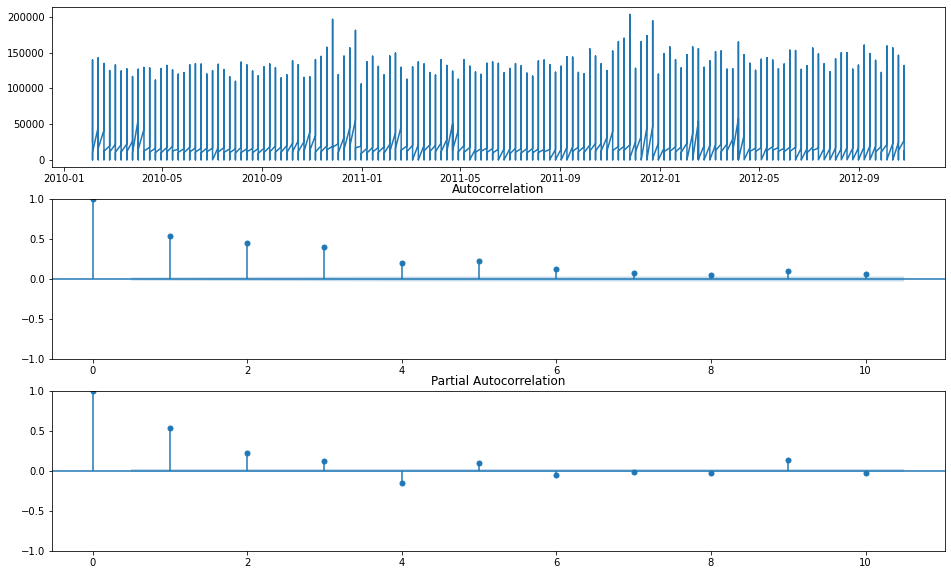

In [16]:
# plots 
fig, axs = plt.subplots(3, 1,figsize=(16,10))
axs[0].plot(df_clean['Weekly_Sales'])
#axs[0].set_xticks(np.arange(0,len(df_clean.Weekly_Sales),10))                                                       # display every 10-th tick
#axs[0].set_xticklabels(df_clean.Date[np.arange(0,len(df_clean.Weekly_Sales),10)],rotation=20); 
sm.graphics.tsa.plot_acf(df_clean.Weekly_Sales, lags=10, ax=axs[1]);
sm.graphics.tsa.plot_pacf(df_clean.Weekly_Sales, lags=10, ax=axs[2]);

d:\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


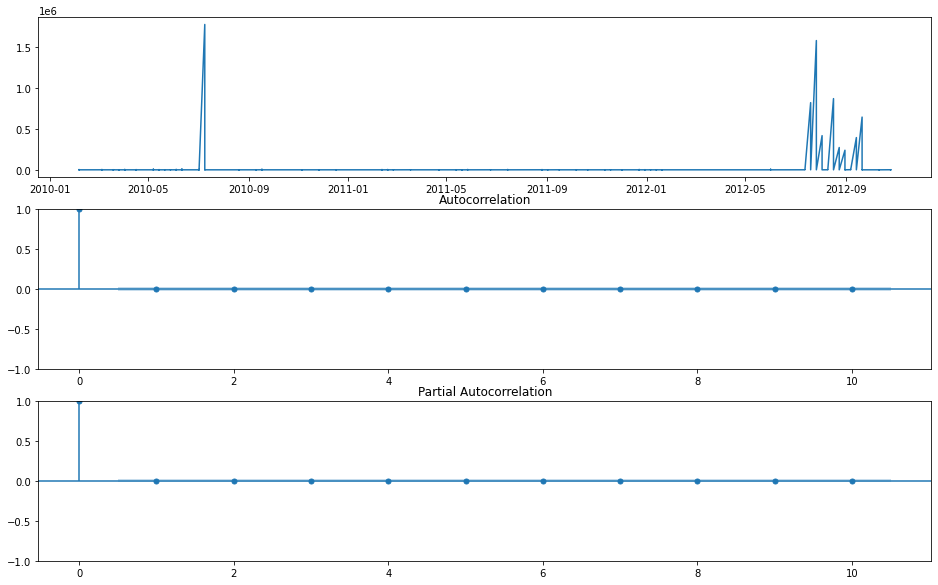

In [17]:
# PART 1: Plot first differences of the series and AC& PAC
df_clean['DW_Sales'] = df_clean['Weekly_Sales'].pct_change()

# plots 
fig, axs = plt.subplots(3, 1,figsize=(16,10))
axs[0].plot(df_clean['DW_Sales'].dropna())
#axs[0].set_xticks(np.arange(0,len(df['dy'].dropna()),10))                                                       # display every 10-th tick
#axs[0].set_xticklabels(df.date[np.arange(1,len(df['dy'].dropna())+1,10)],rotation=20);                            # label ticks
sm.graphics.tsa.plot_acf(df_clean['DW_Sales'].dropna(), lags=10, ax=axs[1]);
sm.graphics.tsa.plot_pacf(df_clean['DW_Sales'].dropna(), lags=10, ax=axs[2]);
